# Actividad 5

In [1]:
print ("Hello World")

Hello World


# Preparación de los Datos 
## Curso Ingeniería Masiva de Datos
## TecMilenio


- Objetivo:
   
    - Mostrar lo que se hace cuando se prepara a los datos
    - En proyectos reales entre el 50% y 80% del tiempo se emplea en tareas de preparación de los datos para empezar a modelar
    
  
- Librerías de Python usadas:
    - pandas
    - Matplotlib
    - Numpy
   

Dataset para el ejemplo tomado de : https://archive.ics.uci.edu/ml/datasets/Adult

1. Limpieza de Datos
    1. Manejo de diferentes tipos de datos 
    2. Manejo de datos faltantes
2. Exploración de los Datos
    1. Descripción de los datos
    2. Gráficas de las distribuciones de los Datos
    3. Detección de valores atípicos
3. Creando los Datos para hacer el Modelo
    1. Relaciones entre variables
    2. Selección de variables

## Modelo

Un modelo que dados los atributos sobre una persona haga una predicción para saber s si su ingreso es <= 50K o> 50K

## Datos

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.represents final weight, which is the number of units in the target population that the responding unit represents
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.7



In [2]:
# Importando librerías y datos
import numpy as np
import pandas as pd

df = pd.read_csv('adult.csv',na_values=['#NAME?'])

In [3]:
print(df.head(5))


    age         workclass    fnlwgt  education  education_num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black     NaN   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

In [4]:
df.shape

(5000, 15)

In [5]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [6]:
type(df['education'][0])

str

In [7]:
# Ver la variable 'income' el tipo y cuantos hay de cada tipo
print(df['income'].value_counts())

<=50K    3779
>50K     1221
Name: income, dtype: int64


In [8]:
# Asignar el valor de 0 Si income <=50K y de 1 Si 1 income >50K
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]

# Crear dos DataFrames X con variables indpendientes o features y uno y con variable dependiente , la que vamos a predecir
X = df.drop('income', 1)
y = df.income

/var/folders/z8/30bqfqnn67l0n_h8qh5hdt740000gn/T/ipykernel_77762/2219514019.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('income', 1)


In [9]:
print(X.head(5))

    age         workclass    fnlwgt  education  education_num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black     NaN   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  
0          2174             0              40  United-States  
1             0             0         

In [10]:
print(y.head(5))

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64


## 1. Limpieza de Datos

### A. Manejo de diferentes tipos de datos 

- Hay tres tipos principales de datos:
    - Cuantitativo, Numérico: ingreso, edad
    - Cualitativo, Categórico:  género, nacionalidad
    - Cualitativo, Categórico Ordinal: bajo medio alto
    
- Los modelos sólo pueden manejar variables cuantitativas numéricas
- Se deben convertir las variables cualitativas ó categóricas en variables numéricas
    - Crear variables extra
    - Transformar una variable cualitativa o categórica en un conjunto de variables extra, cada una representando una categoría única
    - En el conjunto de variables extra, 1 indica que la observación pertenece a esa categoría
    

In [11]:
# Education es una variable cualitativa
print(X['education'].head(20))

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
5          Masters
6              9th
7          HS-grad
8          Masters
9        Bachelors
10    Some-college
11       Bachelors
12       Bachelors
13      Assoc-acdm
14       Assoc-voc
15         7th-8th
16         HS-grad
17         HS-grad
18            11th
19         Masters
Name: education, dtype: object


In [12]:
# Ver las caterorías de las variables categoricas o cualitativas

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print('Variable ''{col_name} tiene {unique_cat} categorías'.format(col_name=col_name, unique_cat=unique_cat))


Variable workclass tiene 8 categorías
Variable education tiene 17 categorías
Variable marital_status tiene 7 categorías
Variable occupation tiene 15 categorías
Variable relationship tiene 6 categorías
Variable race tiene 6 categorías
Variable sex tiene 3 categorías
Variable native_country tiene 40 categorías


In [13]:
# Use get_dummies de pandas para crear las variables dummies extra para representar a las variable cualitativa como numéricas
# Otra opción es usar  OneHotEncoder de la librería:  sci-kit learn
print(pd.get_dummies(X['education']).head(5))

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  ?  Assoc-acdm  Assoc-voc  \
0     0     0     0        0        0        0    0  0           0          0   
1     0     0     0        0        0        0    0  0           0          0   
2     0     0     0        0        0        0    0  0           0          0   
3     0     1     0        0        0        0    0  0           0          0   
4     0     0     0        0        0        0    0  0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          1          0        0        0          0            0   
1          1          0        0        0          0            0   
2          0          0        1        0          0            0   
3          0          0        0        0          0            0   
4          1          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             0  
4       

In [14]:
# Para ver las categorías de 'native_country' y vemos que es dominante la de Unites States
print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

United-States    4465
Mexico            104
?                  97
Canada             28
Philippines        22
Germany            22
El-Salvador        16
Puerto-Rico        16
England            16
China              15
Name: native_country, dtype: int64


In [15]:
# Podemos hacer que la baja frecuencia de las otras queden clasificadas como "Other"
X['native_country'] = ['United-States ' if x == 'United-States' else 'Other' for x in X['native_country']]

print(X['native_country'].value_counts().sort_values(ascending=False))

United-States     4465
Other              535
Name: native_country, dtype: int64


### Cambio de variables cualitativas

In [16]:
# Crear toda la lista de variables categóricas para transformarlas a numéricas
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [17]:
# Función para llamar get dummies c
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [18]:
X = dummy_df(X, todummy_list)
print(X.head(5))

    age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  39.0   77516.0           13.0          2174             0              40   
1  50.0   83311.0           13.0             0             0              13   
2  38.0  215646.0            9.0             0             0              40   
3  53.0  234721.0            7.0             0             0              40   
4  28.0  338409.0           13.0             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0            0                      0                    0                  0   
1            0                      0                    0                  0   
2            0                      0                    0                  1   
3            0                      0                    0                  1   
4            0                      0                    0                  1   

   ...  relationship_Wife  race_

/var/folders/z8/30bqfqnn67l0n_h8qh5hdt740000gn/T/ipykernel_77762/4111261431.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(x, 1)


### B. Manejo de datos faltantes

- Los modelos no pueden manejar datos faltantes


- La solución más simple
    - Eliminar observaciones / características que tienen datos faltantes
    

- Pero, eliminar datos faltantes puede presentar muchos problemas
    - Datos faltantes están distribuidos al azar y son muchos : posiblemente pierda muchos de sus datos
    - Datos faltantes no están distribuidos al azar y son muchos : además de perder datos, también está introduciendo posibles sesgos


- Una solución alternativa es utilizar la imputación.
    - Reemplace el valor faltante con otro valor
    - Estrategias: media, mediana, valor de frecuencia más alta de una variable dada
    
  

### Modificación -> Ocupar "SimpleImputer" en vez de "Imputer" de sklearn.preprocessing, ya que esta obsolteto en versiones recientes

In [19]:
# Cuantos son datos faltantes?
X.isnull().sum().sort_values(ascending=False).head()

fnlwgt                  107
education_num            57
age                      48
native_country_Other      0
sex_Male                  0
dtype: int64

In [20]:
# Para Imputar / Reemplazar los valores faltantes se usa SimpleImputer de sklearn.impute
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
X = pd.DataFrame(data=imp.fit_transform(X), columns=X.columns)

In [21]:
#Ahora volvemos a verificar como los nulos se han reemplazado con un valor
X.isnull().sum().sort_values(ascending=False).head()

age                           0
occupation_Farming-fishing    0
occupation_Protective-serv    0
occupation_Prof-specialty     0
occupation_Priv-house-serv    0
dtype: int64

## 2. Exploration de los Datos
- Entender el problema y los datos es extremadamente importante para construir modelos
- Se hace lo que se conoce como Análisis Exploratorio de los Datos para explorar sus datos entenderlos y tomar mejores decisiones al modelar

### A.Descripción de los Datos

In [22]:
X.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.571200,1.907303e+05,10.079400,1033.640200,93.696800,40.519000,0.066200,0.029200,0.065800,0.687000,...,0.04900,0.009600,0.029000,0.098600,0.005800,0.804200,0.324200,0.666400,0.107000,0.893000
std,13.517776,1.054410e+05,2.520787,7051.802077,410.801418,12.109193,0.248656,0.168384,0.247957,0.463761,...,0.21589,0.097518,0.167823,0.298154,0.075944,0.396855,0.468122,0.471546,0.309144,0.309144
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.186872e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,1.795330e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,47.000000,2.401560e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,2547.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### B.Gráficas de las distribuciones de los Datos

In [23]:
# Use pyplot de matplotlib para hacer histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title('Histogram of ''{var_name}'.format(var_name=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frecuency')
    plt.show()

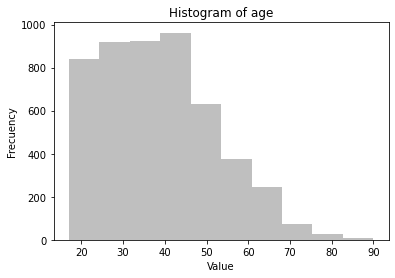

In [24]:
plot_histogram(X['age'])

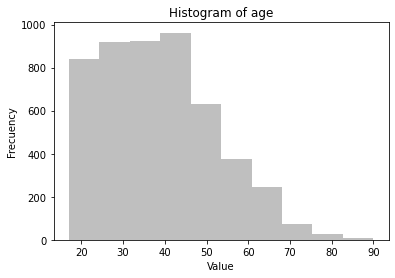

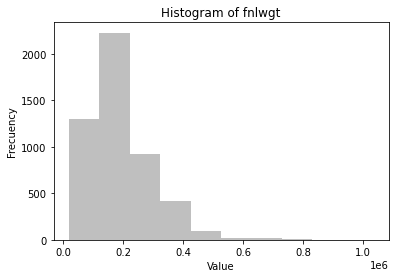

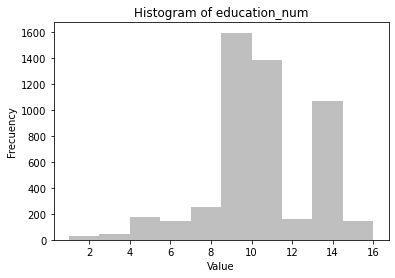

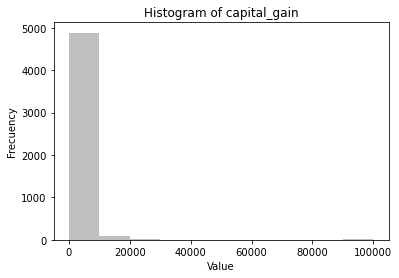

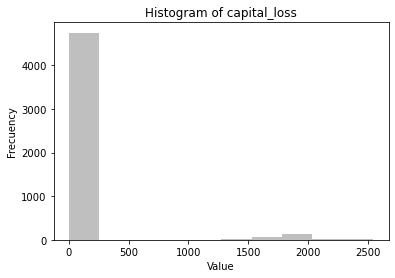

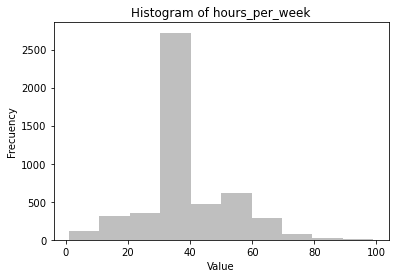

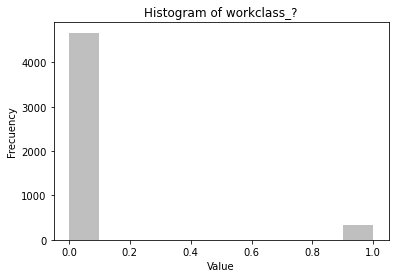

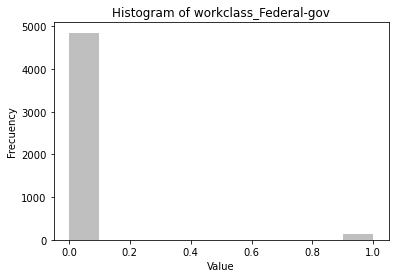

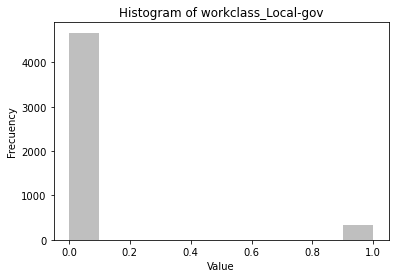

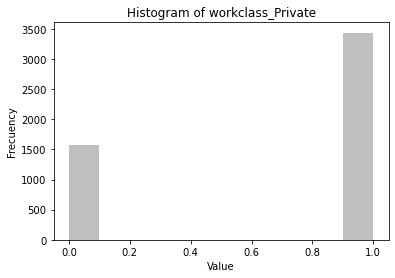

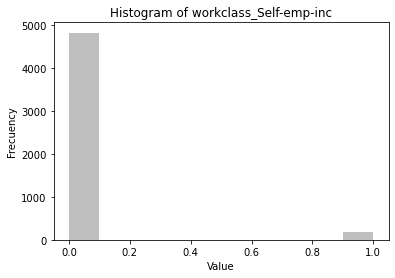

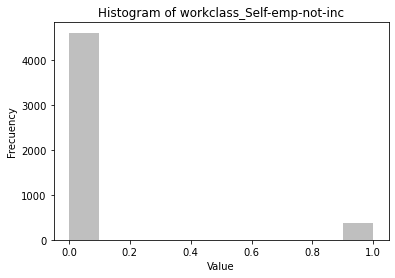

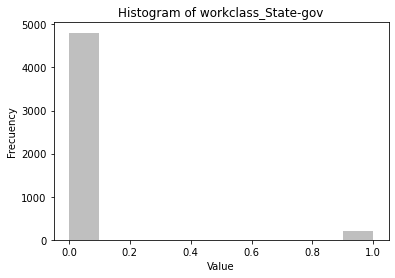

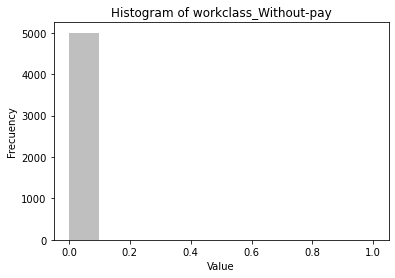

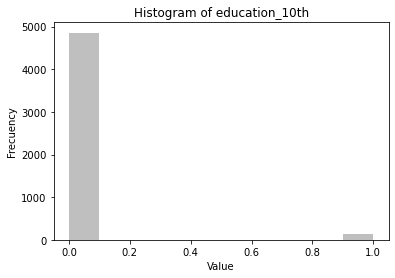

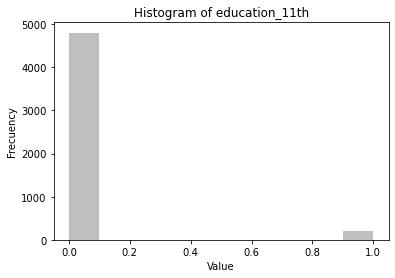

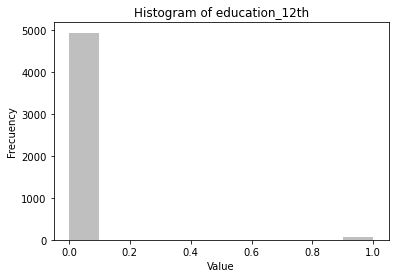

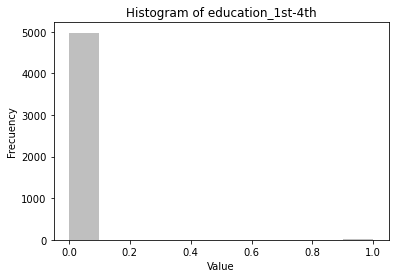

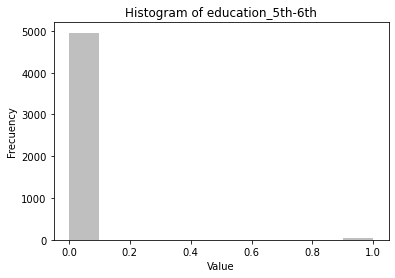

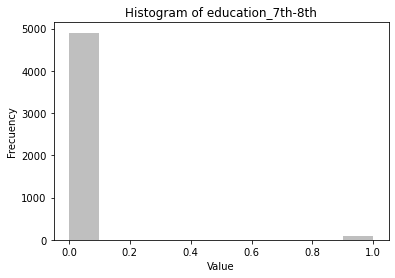

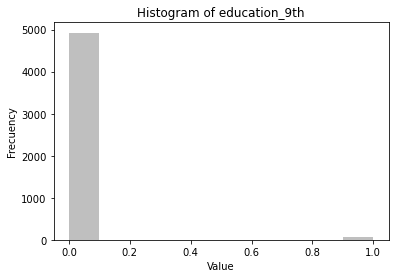

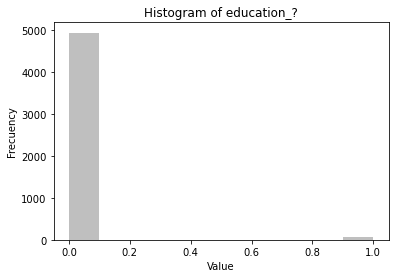

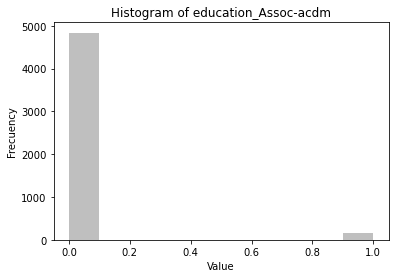

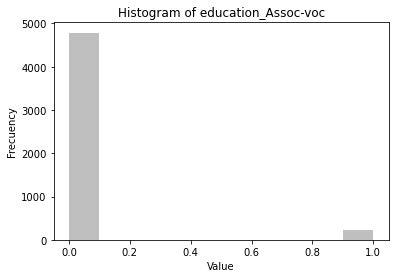

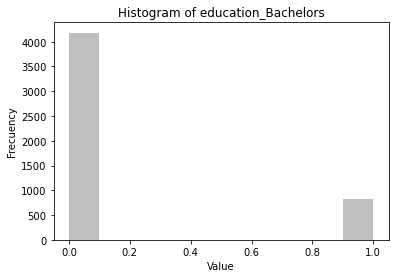

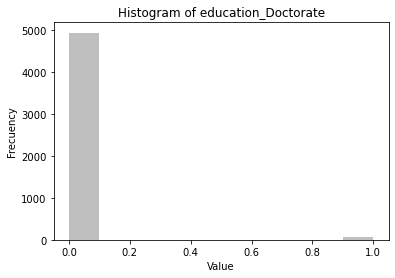

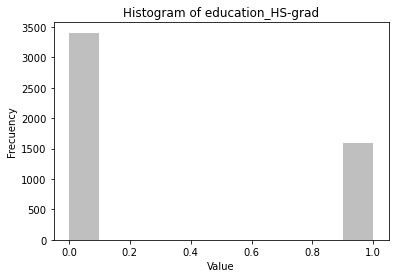

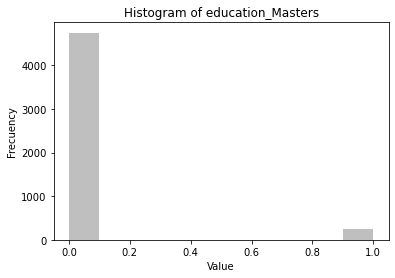

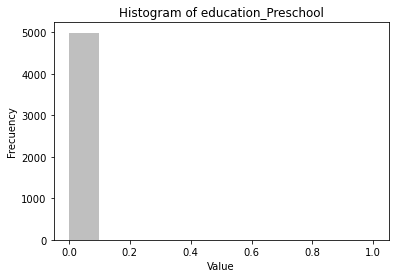

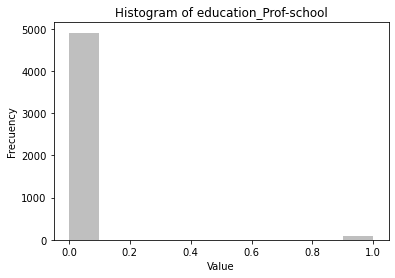

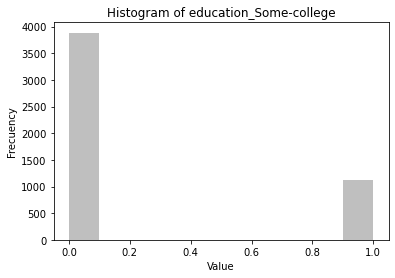

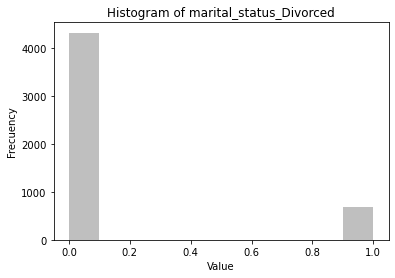

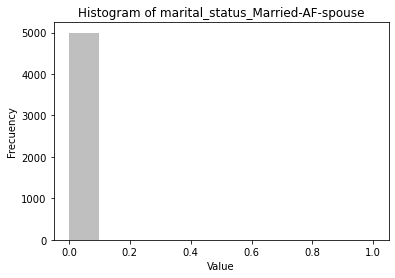

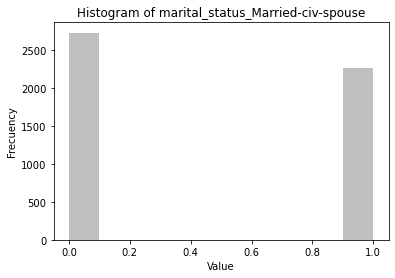

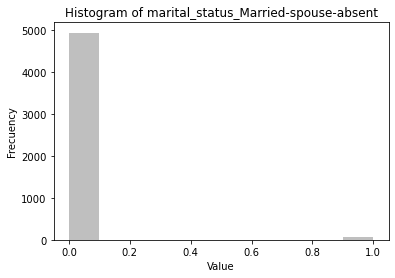

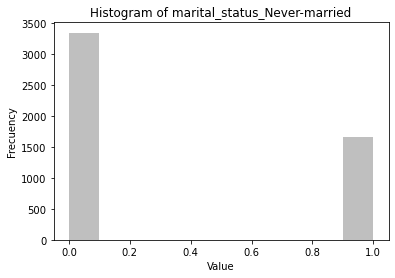

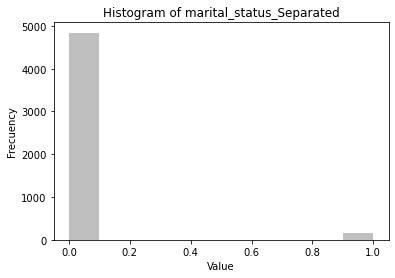

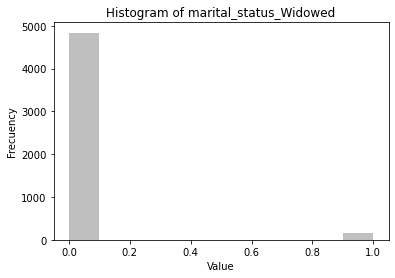

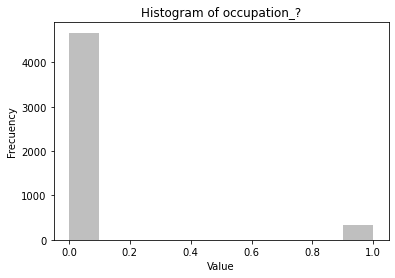

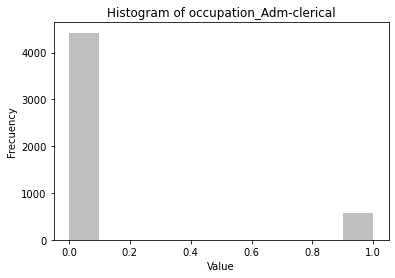

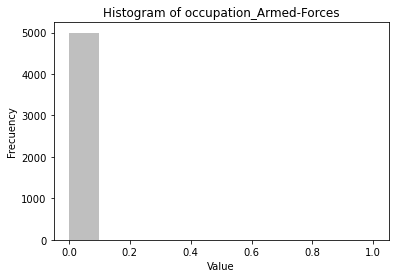

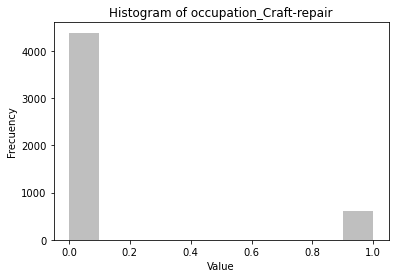

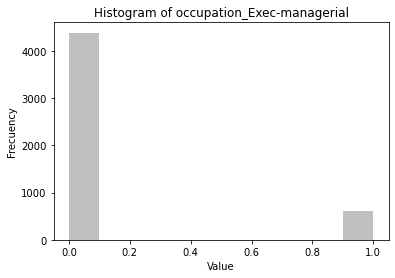

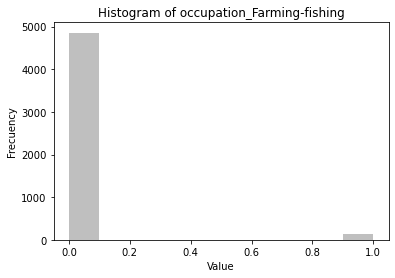

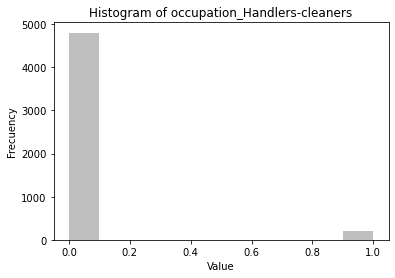

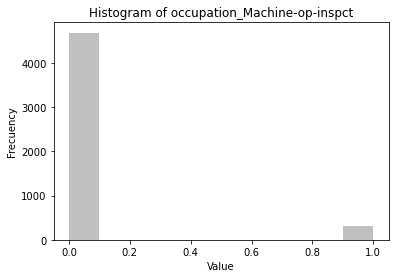

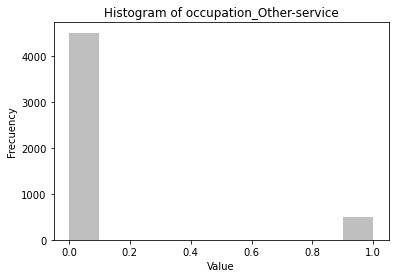

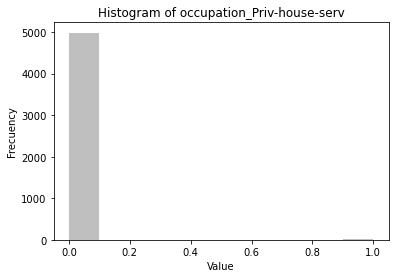

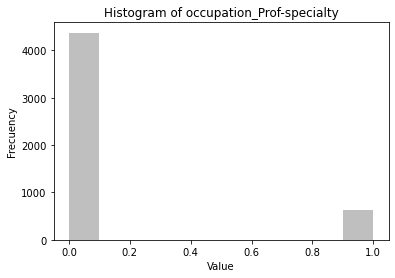

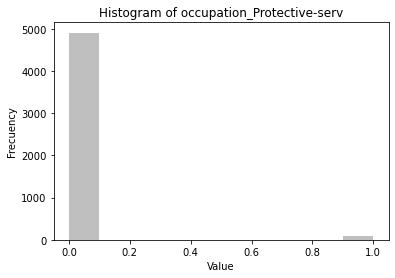

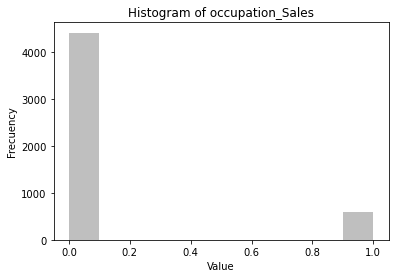

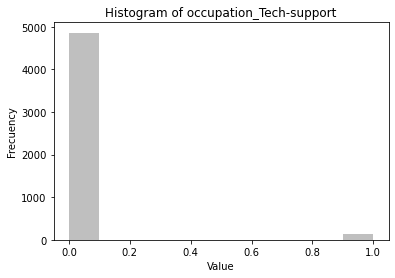

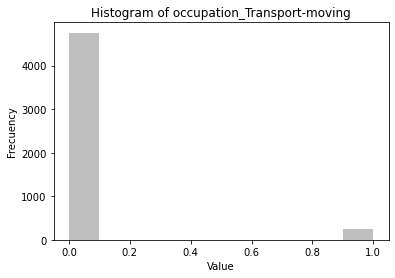

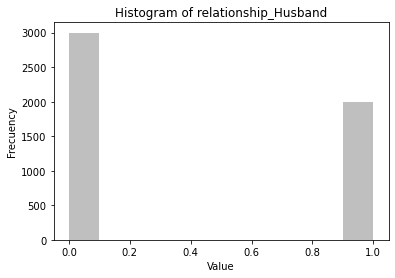

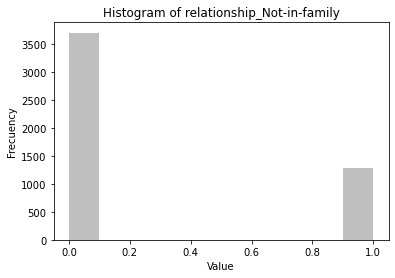

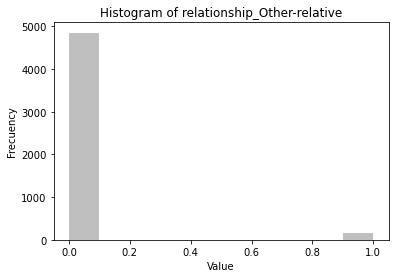

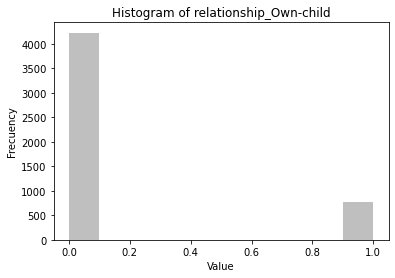

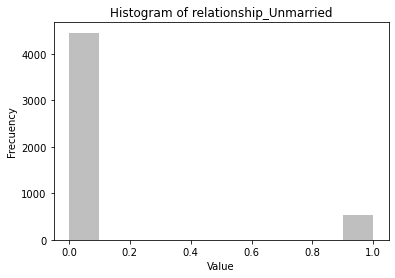

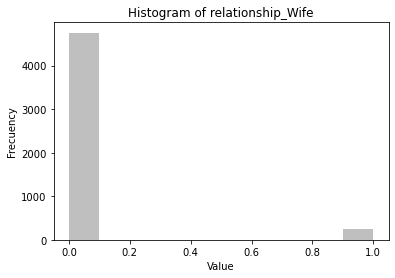

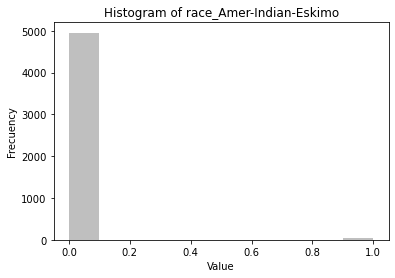

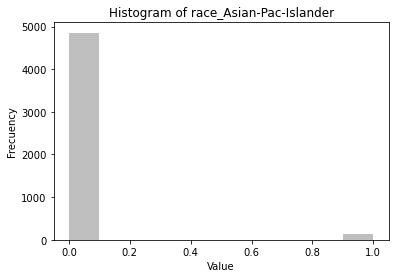

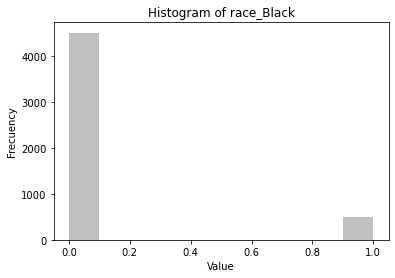

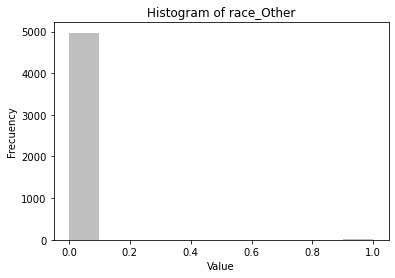

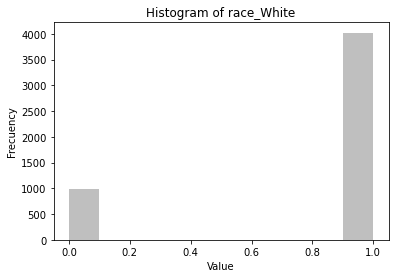

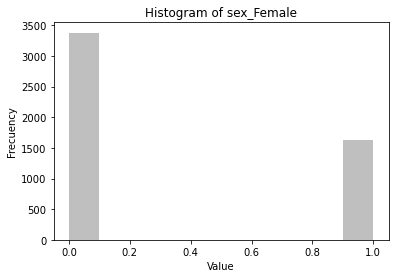

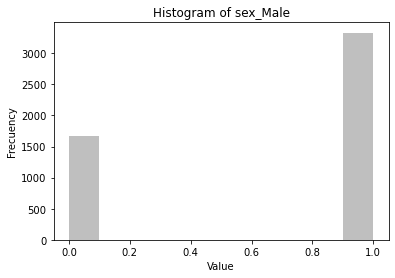

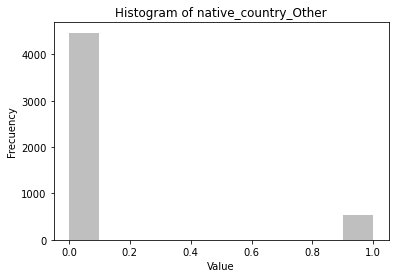

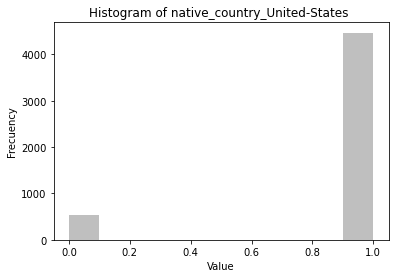

In [25]:
for col_name in X.columns:
    plot_histogram(X[col_name])
    

### C. Detección de valores atípicos

- Un valor atípico es una observación que se desvía drásticamente de otras observaciones en un conjunto de datos


- Ocurrencia:
    - Natural, por ejemplo Ingresos de Millonarios
    - Error, por ejemplo peso humano de 5,00 kg. debido al error de escritura adicional 0

- ¿Por qué son problemáticos?
    - Si ocurren naturalmente
        - No necesariamente problemático
        - Pero pueden sesgar su modelo
    - Error 
        - Indicativo de problemas de calidad de datos.
        - Tratar de la misma manera como un valor faltante, es decir, usar la imputación
   
   
- ¿Cómo se detectan?
    - Visualizaciones Box Plot



 ### Detección de valores atípicos - Usando Box Plots
- Identifica valores extremos en los datos.
- Los valores atípicos se definen como:
    - Valores inferiores a Q1-1.5 (Q3-Q1) o superiores a Q3 + 1.5 (Q3-Q1)

 

### Modificación -> Se definió la función "find_outliners_iqr" para identificar los valores atípicos con un rango intercuartílico y una caja de diagramas/box plot para gráficarlas. En la gráfica no se imprime ningún valor y eso significa que no hay valores que caigan fuera de los límires del rango

In [26]:
def find_outliers_iqr(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (x < lower_bound) | (x > upper_bound)
    return outliers

In [27]:
# Elegir la variable que deseas analizar (por ejemplo, 'age')
variable_to_analyze = 'age'

In [28]:
# Encontrar valores atípicos utilizando la función find_outliers_iqr
outliers = find_outliers_iqr(df[variable_to_analyze])

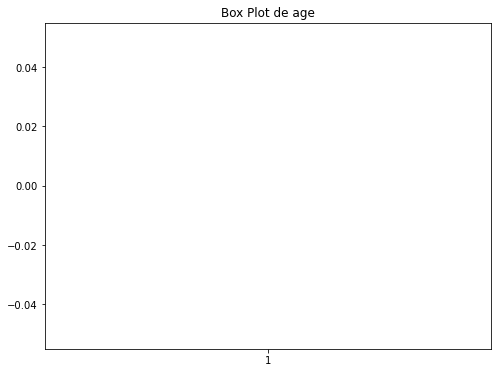

In [29]:
# Visualizar los valores atípicos usando un diagrama de caja
plt.figure(figsize=(8, 6))
plt.boxplot(df[variable_to_analyze])
plt.title(f'Box Plot de {variable_to_analyze}')
plt.show()

In [30]:
# Mostrar los valores atípicos
outlier_values = df[variable_to_analyze][outliers]
print(f'Valores atípicos en {variable_to_analyze}:\n{outlier_values}')

Valores atípicos en age:
Series([], Name: age, dtype: float64)


## 3. Creando los Datos para hacer el Modelo

### A. Relaciones entre variables

- La variables independientes pueden estar correlacionadas y en ocasiones hay modelos como las regersiones que no permiten isar variables correlacionadas porque se afecta el resultado.

- Fecha de Nacimiento y Edad tienen una relación entre ellas y hay que decidir cual usar.
- No siempre es evidente esta relación entre las variables




In [31]:
# Puedes analizar una matriz de correlaciones de todas las variables
X.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
age,1.000000,-0.080116,0.018769,0.064296,0.056885,0.040538,0.006840,0.049796,0.056642,-0.177769,...,0.032632,-0.013721,-0.029348,-0.001618,-0.033626,0.026744,-0.073938,0.069944,-0.032005,0.032005
fnlwgt,-0.080116,1.000000,-0.058249,-0.000142,-0.004304,-0.006364,-0.003647,0.005205,-0.007592,0.034287,...,-0.024594,-0.072032,-0.054709,0.112766,-0.007250,-0.036127,-0.034949,0.025109,0.080540,-0.080540
education_num,0.018769,-0.058249,1.000000,0.113470,0.096638,0.165958,-0.088811,0.045435,0.068769,-0.097491,...,0.030342,-0.042162,0.074469,-0.082814,-0.054652,0.058536,-0.021819,0.023803,-0.072511,0.072511
capital_gain,0.064296,-0.000142,0.113470,1.000000,-0.033439,0.071881,-0.024709,-0.009880,-0.015945,-0.034812,...,0.027416,-0.007988,0.018937,-0.027529,-0.011197,0.020249,-0.043610,0.044387,0.012697,-0.012697
capital_loss,0.056885,-0.004304,0.096638,-0.033439,1.000000,0.079426,-0.033428,0.011473,0.034958,-0.018600,...,0.032977,-0.022458,0.013884,-0.035910,0.020716,0.021822,-0.062023,0.062702,0.002818,-0.002818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
race_White,0.026744,-0.036127,0.058536,0.020249,0.021822,0.064192,-0.034847,-0.064101,-0.027610,0.007144,...,-0.009407,-0.199529,-0.350239,-0.670279,-0.154794,1.000000,-0.088951,0.090226,-0.134105,0.134105
sex_Female,-0.073938,-0.034949,-0.021819,-0.043610,-0.062023,-0.229214,0.066490,0.001692,0.047114,0.030751,...,0.323767,0.019449,0.012708,0.093403,0.008993,-0.088951,1.000000,-0.978931,-0.010294,0.010294
sex_Male,0.069944,0.025109,0.023803,0.044387,0.062702,0.229000,-0.064111,-0.003261,-0.044903,-0.030263,...,-0.318856,-0.017345,-0.009171,-0.097514,-0.012991,0.090226,-0.978931,1.000000,0.010259,-0.010259
native_country_Other,-0.032005,0.080540,-0.072511,0.012697,0.002818,0.011881,-0.016699,-0.010076,-0.039674,0.042493,...,0.017339,-0.007538,0.337316,-0.016822,0.084327,-0.134105,-0.010294,0.010259,1.000000,-1.000000


### B. Selección de Variables


### Modificación -> se cambia la línea "from sklearn.cross_validation import train_test_split" por "from sklearn.model_selection import train_test_split", ya que es la forma recomendada y reciente de dividir los datos en conjuntos de entrenamiento y prueba

In [32]:
# Al agregar variable dummies por variables categóricas se incrementó el número de variables
print(df.shape)
print(X.shape)

(5000, 15)
(5000, 68)


In [33]:
# Usar train_test_split in sklearn.model_selection para partir los datos en dos set de enternamiento y de testeo
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)


In [34]:

# Usar el  método feature selection para seleccionar las varuables más significativas
import sklearn.feature_selection


select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]


In [35]:
print(colnames_selected)

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Self-emp-inc', 'education_Bachelors', 'education_Masters', 'marital_status_Married-civ-spouse', 'marital_status_Never-married', 'occupation_Exec-managerial', 'occupation_Other-service', 'occupation_Prof-specialty', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Female', 'sex_Male']


In [36]:
print(len(colnames_selected))

20


### Predicción de hombres y mujeres

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Contar el número de hombres y mujeres en el conjunto de prueba
num_hombres = np.sum(y_test == 1)
num_mujeres = np.sum(y_test == 0)
total_personas = len(y_test)

# Calcular los porcentajes
porcentaje_hombres = (num_hombres / total_personas) * 100
porcentaje_mujeres = (num_mujeres / total_personas) * 100

print(f'Número de hombres en el conjunto de prueba: {num_hombres}')
print(f'Número de mujeres en el conjunto de prueba: {num_mujeres}')
print(f'Porcentaje de hombres en el conjunto de prueba: {porcentaje_hombres:.2f}%')
print(f'Porcentaje de mujeres en el conjunto de prueba: {porcentaje_mujeres:.2f}%\n')

# Entrenar un modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)

# Evaluar el rendimiento del modelo de Regresión Logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Precisión del modelo de Regresión Logística: {accuracy_logistic}')

# Mostrar un informe de clasificación con más métricas para Regresión Logística
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
print('Informe de clasificación (Regresión Logística):\n', classification_rep_logistic)

Número de hombres en el conjunto de prueba: 402
Número de mujeres en el conjunto de prueba: 1098
Porcentaje de hombres en el conjunto de prueba: 26.80%
Porcentaje de mujeres en el conjunto de prueba: 73.20%

Precisión del modelo de Regresión Logística: 0.7733333333333333
Informe de clasificación (Regresión Logística):
               precision    recall  f1-score   support

           0       0.78      0.97      0.86      1098
           1       0.73      0.24      0.36       402

    accuracy                           0.77      1500
   macro avg       0.76      0.60      0.61      1500
weighted avg       0.77      0.77      0.73      1500



### Creación de tabla final de la preparación de datos

In [38]:
# Concatenar X e y en un solo DataFrame
df_final = pd.concat([X, y], axis=1)

# Guardar esta tabla final en archivo CSV 
df_final.to_csv('tabla_final.csv', index=False)

df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States,income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43.0,222971.0,3.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
4996,31.0,259425.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4997,47.0,212120.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4998,37.0,245880.0,9.0,0.0,0.0,60.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
